### Doing the MNIST example, but using Tensor Flow

In [28]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.image as mpimg
import numpy as np

In [3]:
print(tf.__version__)

1.13.1


In [8]:
mnist = keras.datasets.mnist

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

11493376/11490434 [==============================] - 9s 1us/step


In [10]:
train_images.shape

(60000, 28, 28)

In [43]:
type(test_images)

numpy.ndarray

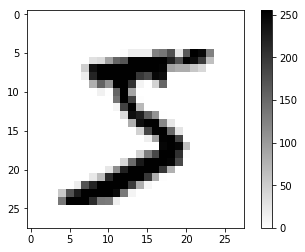

In [15]:
plt.figure()
plt.imshow(train_images[0], cmap = 'binary')
plt.colorbar()

In [16]:
# Normalizing the data
test_images = test_images/255.0
train_images = train_images/255.0

In [41]:
test_images.shape

(10000, 28, 28)

In [17]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
# Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
# Train the model
model.fit(train_images, train_labels, epochs = 30)

Epoch 1/30
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2538 - acc: 0.9276
Epoch 2/30
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1141 - acc: 0.9658
Epoch 3/30
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0783 - acc: 0.9757
Epoch 4/30
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0587 - acc: 0.9821
Epoch 5/30
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0453 - acc: 0.9863
Epoch 6/30
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0367 - acc: 0.9885
Epoch 7/30
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0278 - acc: 0.9915
Epoch 8/30
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0231 - acc: 0.9929
Epoch 9/30
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0194 - acc: 0.9938
Epoch 10/30
60000/60000 [==============================] - 6s 103us/sample - l

In [20]:
# Evaluate network performance on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.1469 - acc: 0.9733


ValueError: all the input arrays must have same number of dimensions

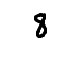

In [45]:
# Path where custom images to test can be added
# Images have to be 28 pixels x 28 pixels
filepath = 'my_images'
files = glob.glob(os.path.join(filepath, '*'))
predicted_labels = "Predicted label: "
n_examples = len(files)
all_images = np.array([])
for i in range(n_examples):
    img = mpimg.imread(files[i])
    img = (np.sum(img, axis=2)/3.)/255. # Flattening the image to remove RGB information. Also normalize it.
    #img = img/255.
    img = 1-img # So that black pixels are 'hot', and the background is white.
    plt.subplot(1, n_examples, i+1)
    plt.imshow(img, cmap = 'binary')
    plt.axis('off')
    np.append(all_images, img, axis = 0)
    print(img.shape)
    #predicted_labels += str(model.predict(img)) + " "
    #predicted_labels += str(np.argmax(net.feedforward(img.reshape(784, 1)))) + " "
    #print(model.predict(img))
    
print("Predicted_labels")#, #model.predict(all_images))

In [36]:
print(len(all_images))

10
